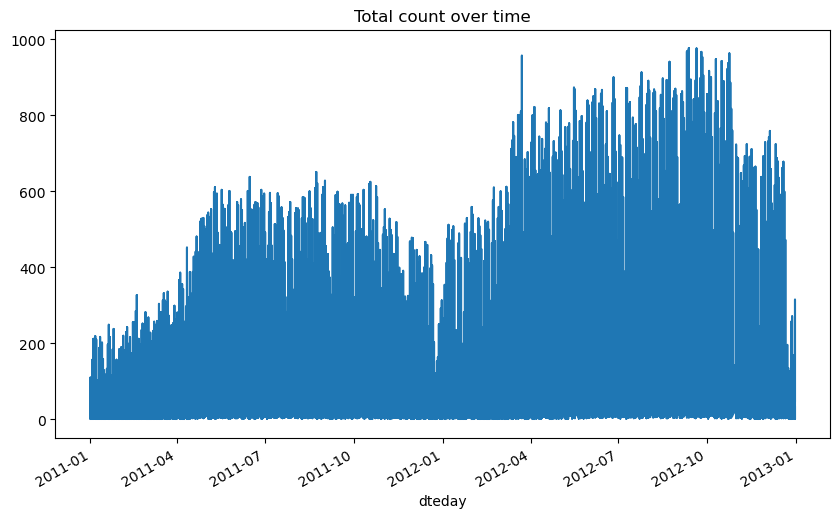

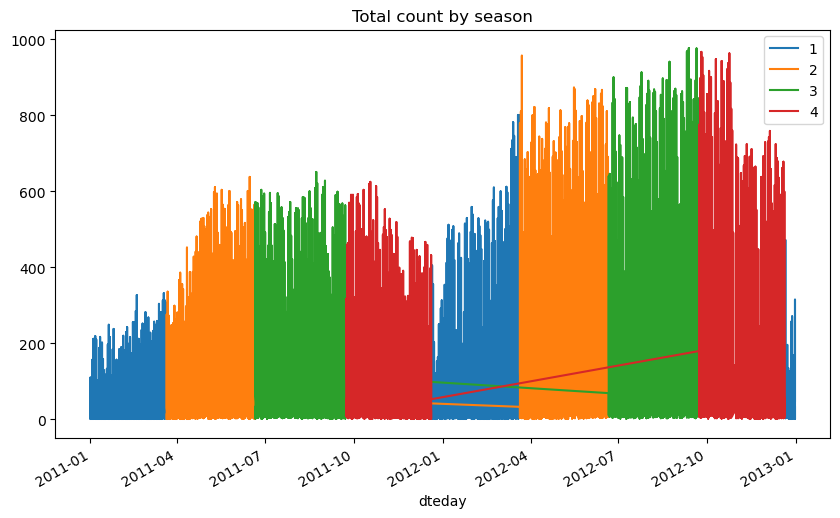

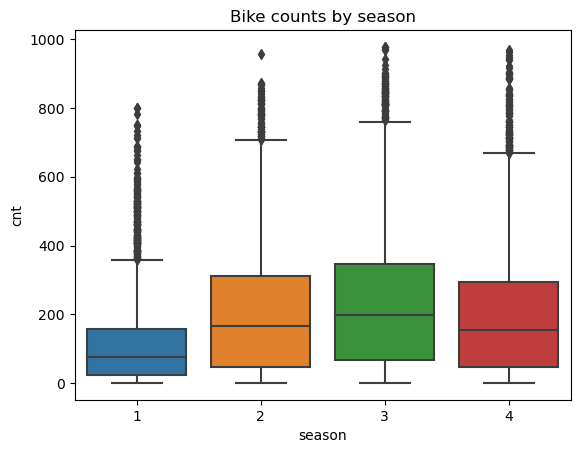

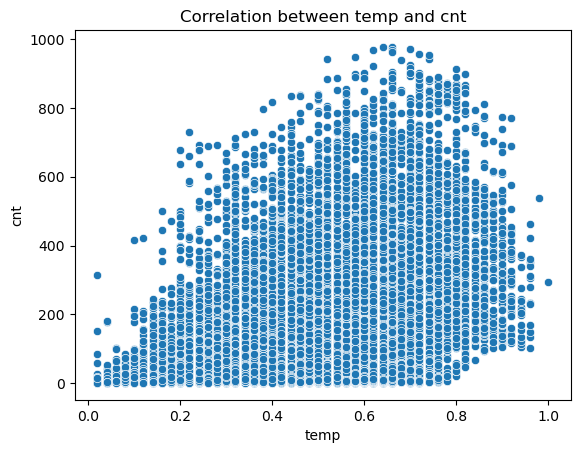

Pearsons correlation: 0.405


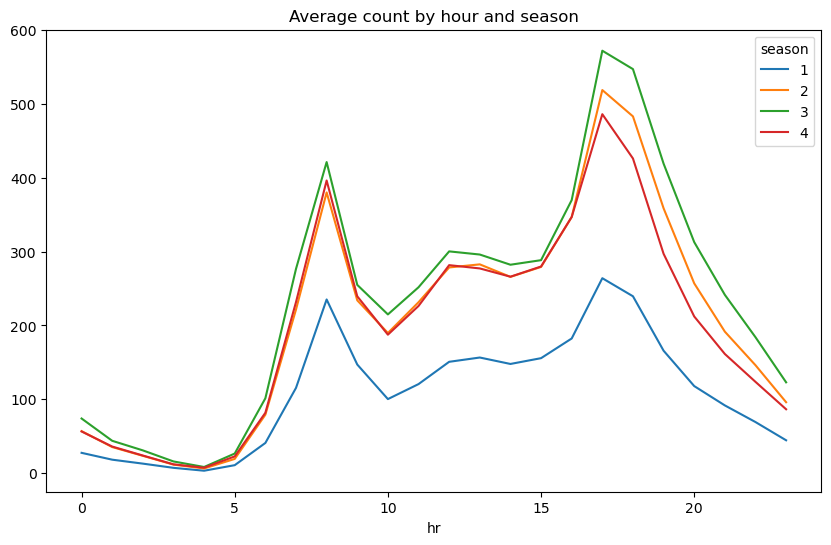

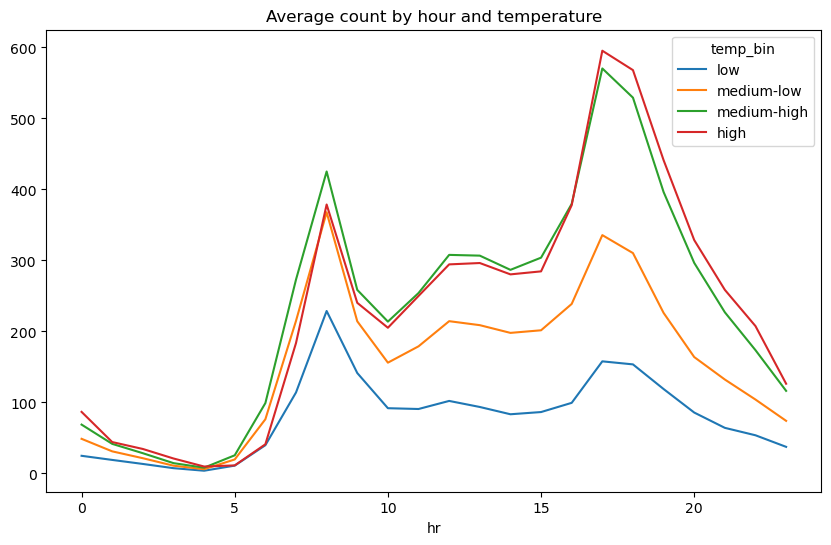

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import sqlite3

# Create a connection to the SQLite database
# Note: You have to replace 'database.db' with your actual database path
conn = sqlite3.connect('database.db')

# Query to select all data from the table in the database
query = "SELECT * FROM data"

# Load the data into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Convert 'dteday' to datetime format and set it as index for the dataframe
df['dteday'] = pd.to_datetime(df['dteday'])
df.set_index('dteday', inplace=True)

# --- Seasonality and Trends ---
# Plot total count over time
df['cnt'].plot(figsize=(10, 6))
plt.title('Total count over time')
plt.show()

# Plot total count by season
df.groupby('season')['cnt'].plot(legend=True, figsize=(10, 6))
plt.title('Total count by season')
plt.show()

# --- Correlations between season and cnt ---
# Boxplot to visualize the distribution of bike counts for each season
sns.boxplot(x='season', y='cnt', data=df)
plt.title('Bike counts by season')
plt.show()

# --- Correlations between temp and cnt ---
# Scatter plot to visualize correlation between temp and cnt
sns.scatterplot(x='temp', y='cnt', data=df)
plt.title('Correlation between temp and cnt')
plt.show()

# Calculate and print Pearson's correlation coefficient between 'temp' and 'cnt'
corr, _ = pearsonr(df['temp'], df['cnt'])
print('Pearsons correlation: %.3f' % corr)

# --- Use hours and season/temp with cnt to draw useful data ---
# Pivot table to observe the average count by hour for each season
pivot_table = df.pivot_table(values='cnt', index='hr', columns='season', aggfunc='mean')
pivot_table.plot(kind='line', figsize=(10,6))
plt.title('Average count by hour and season')
plt.show()

# Divide 'temp' into bins to create categorical temperature ranges
df['temp_bin'] = pd.cut(df['temp'], bins=4, labels=['low', 'medium-low', 'medium-high', 'high'])

# Pivot table to observe the average count by hour for each temperature range
pivot_table_temp = df.pivot_table(values='cnt', index='hr', columns='temp_bin', aggfunc='mean')
pivot_table_temp.plot(kind='line', figsize=(10,6))
plt.title('Average count by hour and temperature')
plt.show()

# Close the database connection
conn.close()
